# <span style='color:#7C93C3'>Assignment 12</span>
## <span style='color:#7C93C3'> DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING</span>
##### <span style='color:#6A9C89'>OBJECTIVE</span>
    This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

### <span style='color:#6A9C89'>1. Data Exploration and Pre-Processing</span>

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [2]:
## Load the dataset and conduct basic exploration (summary statistics, missing values, data types)
df = pd.read_csv('adult_with_headers.csv')
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
## shape of the dataset
rows, columns = df.shape
print(f'Rows = {rows}')
print(f'Columns = {columns}')

Rows = 32561
Columns = 15


In [4]:
## behaviour of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
## checking what datatypes are present in the dataset
set(df.dtypes)

{dtype('int64'), dtype('O')}

so, there are two types of data present ie., Integer and Object

In [6]:
## checking statistical summarization
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
## missing values / null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

No, null values present.

#### <span style='color:#6A9C89'>i. Data Vizualization</span>

In [8]:
## separating the columns based on their characteristics
numerical_cols = [col for col in df.columns if df[col].dtype == 'int64']
categorical_cols = [col for col in df.columns if df[col].dtype != 'int64']
cat_cols_5_vars = [col for col in categorical_cols if len(df[col].value_counts()) <= 5]
cat_cols = [col for col in categorical_cols if not col in cat_cols_5_vars]

In [9]:
## checking the length of each separated columns types
print(f'Length of Numerical Columns : {len(numerical_cols)}')
print(f'Length of Categorical Columns : {len(categorical_cols)}')
print(f'Length of Categorical Columns less than 5 distinct values : {len(cat_cols_5_vars)}')
print(f'Length of Categorical Columns more that 5 distinct values : {len(cat_cols)}')

Length of Numerical Columns : 6
Length of Categorical Columns : 9
Length of Categorical Columns less than 5 distinct values : 3
Length of Categorical Columns more that 5 distinct values : 6


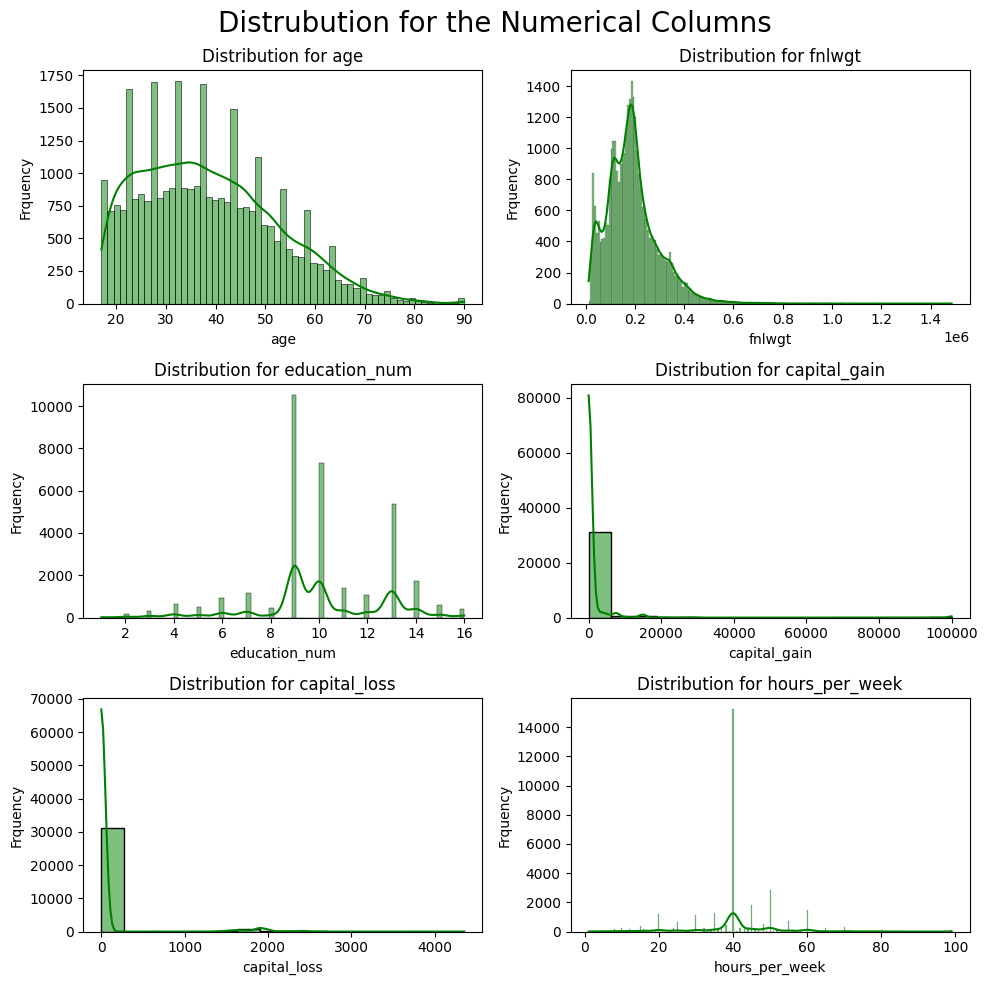

In [10]:
## distribution of numerical columns
plt.figure(figsize=(10,10))
plt.suptitle('Distrubution for the Numerical Columns', fontsize=20)

for idx, col in enumerate(df[numerical_cols], 1):
    plt.subplot(3,2,idx)
    plt.title(f'Distribution for {col}')
    sns.histplot(data=df, x=df[col], kde=True, color='green')
    plt.xlabel(f'{col}')
    plt.ylabel('Frquency')
plt.tight_layout()
plt.show()

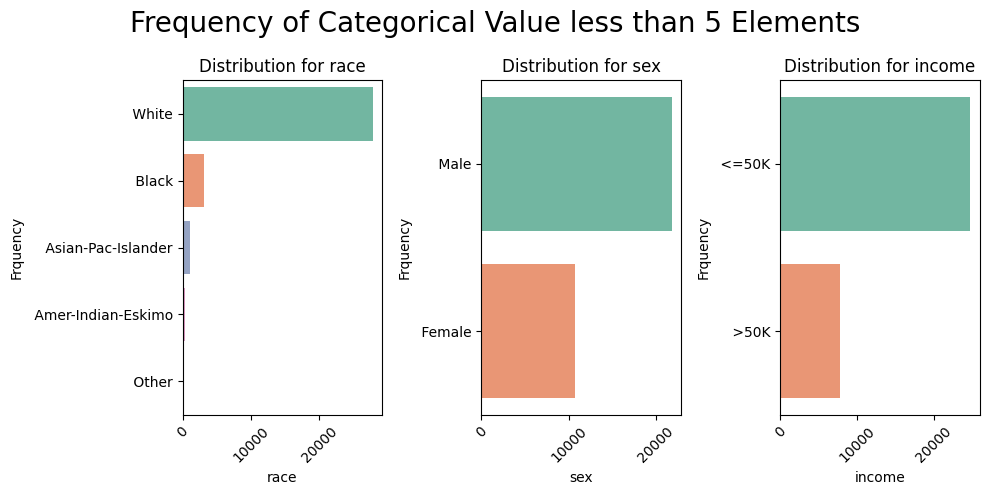

In [11]:
## number of occurence of categorical columns
plt.figure(figsize=(10,5))
plt.suptitle('Frequency of Categorical Value less than 5 Elements', fontsize=20)

for idx, col in enumerate(df[cat_cols_5_vars], 1):
    plt.subplot(1,3,idx)
    plt.title(f'Distribution for {col}')
    value_counts = df[col].value_counts()
    sns.barplot(y=value_counts.index, x=value_counts.values, palette='Set2')
    plt.xlabel(f'{col}')
    plt.ylabel('Frquency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

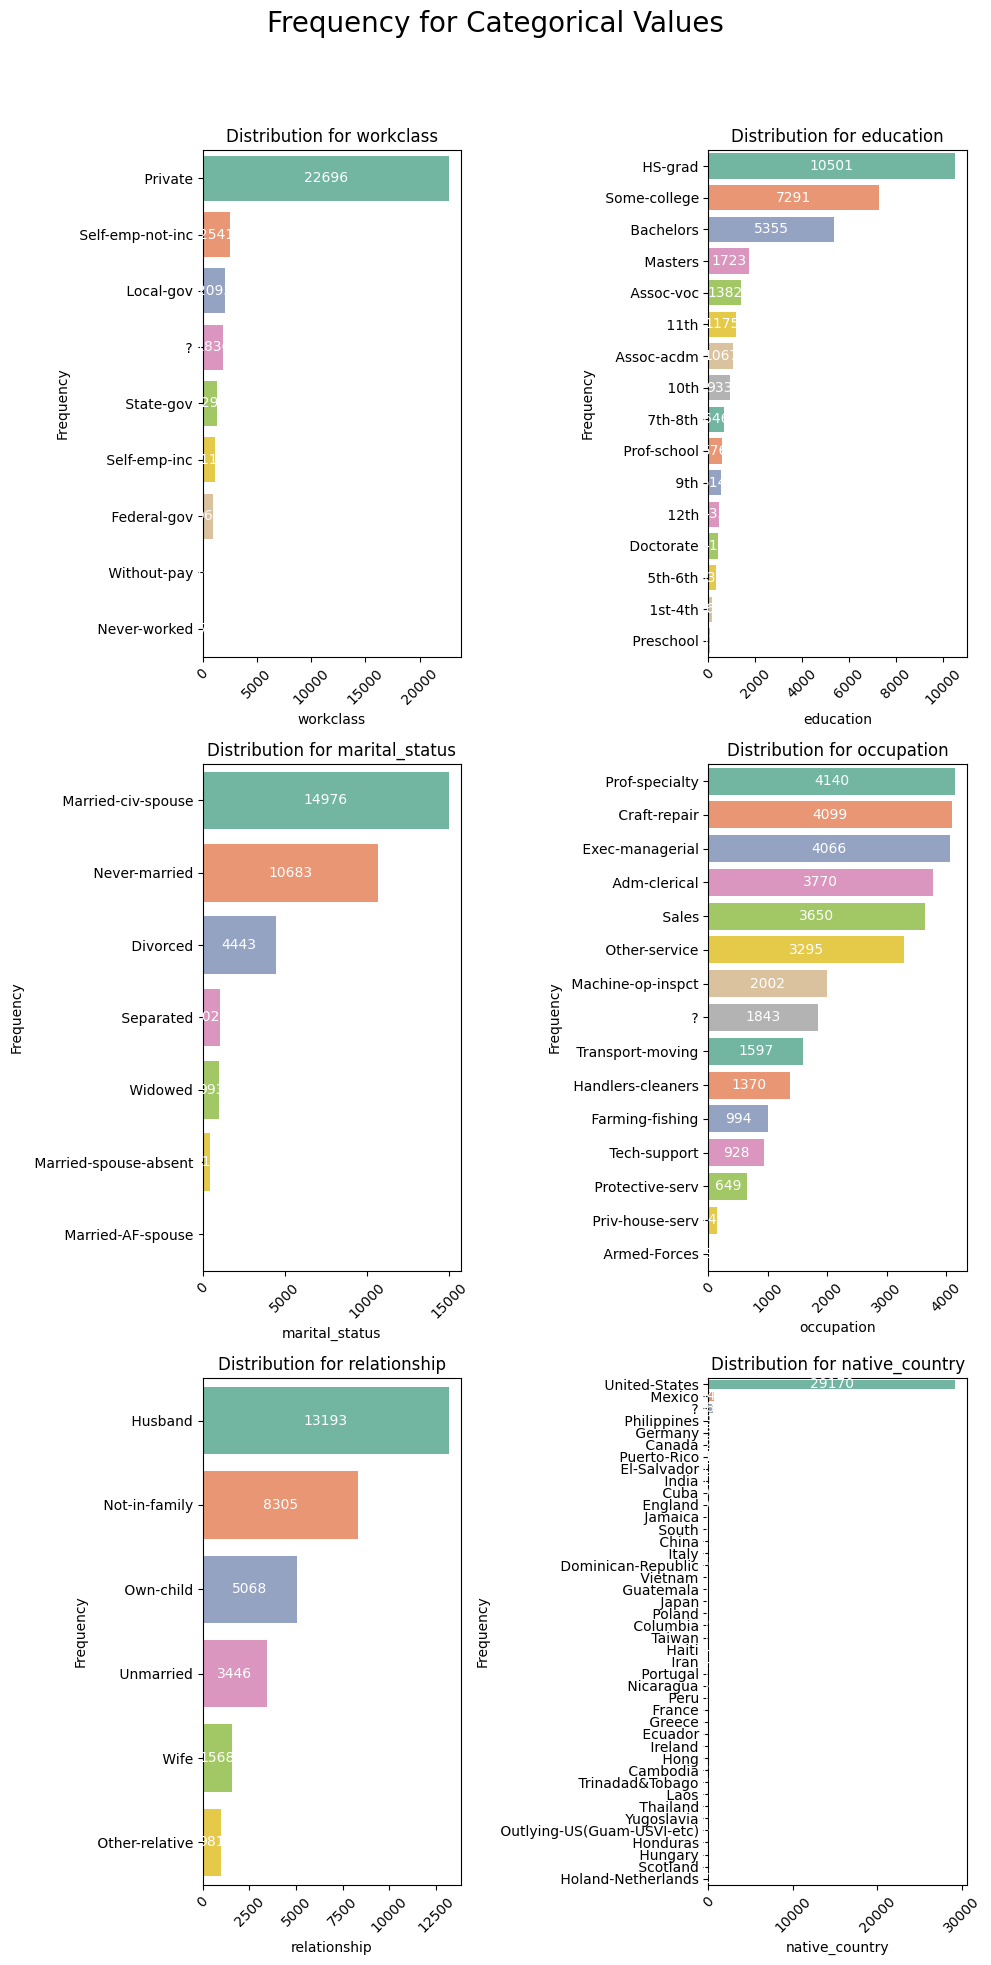

In [12]:
plt.figure(figsize=(10, 20))
plt.suptitle('Frequency for Categorical Values', fontsize=20)

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    plt.title(f'Distribution for {col}')
    value_counts = df[col].value_counts()
    barplot = sns.barplot(y=value_counts.index, x=value_counts.values, palette='Set2')
    
    # Annotate each bar with its count inside the bar
    for i, v in enumerate(value_counts.values):
        barplot.text(v / 2, i, str(v), color='white', va='center', ha='center', fontsize=10)
    
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

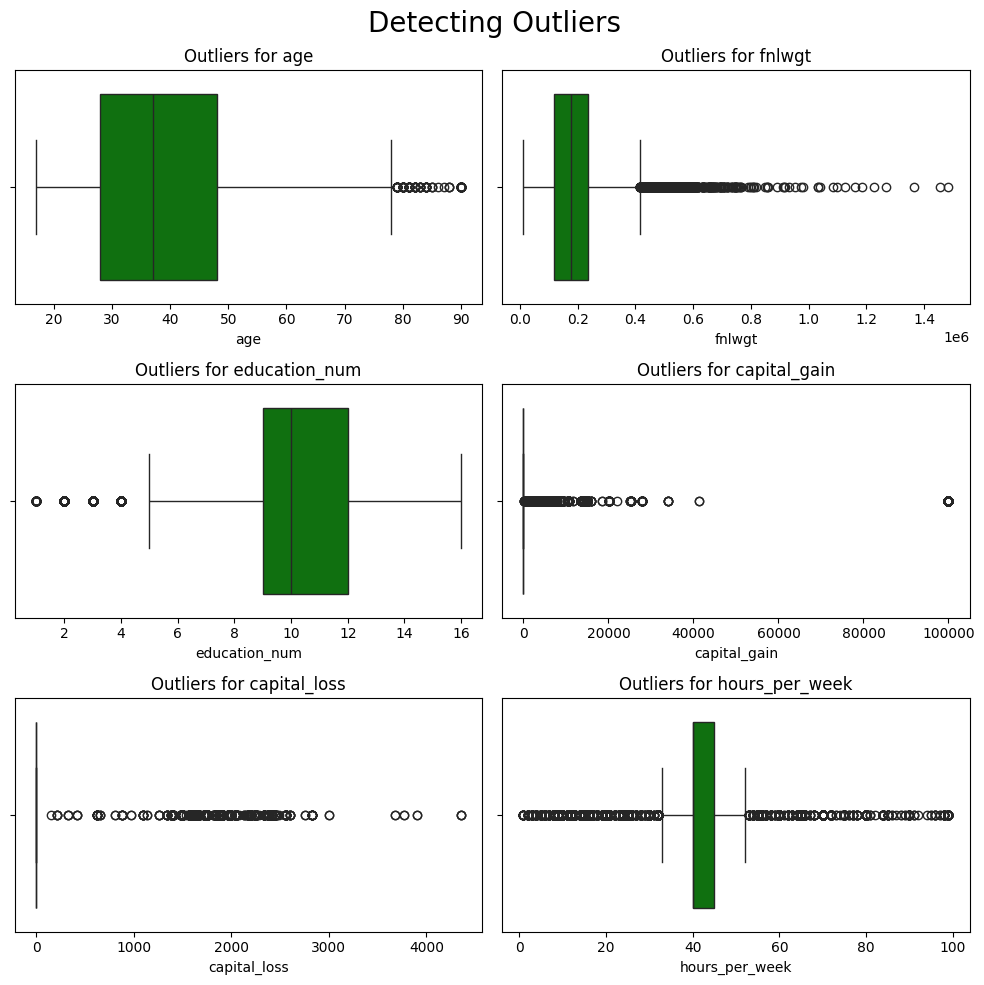

In [13]:
## distribution of numerical columns
plt.figure(figsize=(10,10))
plt.suptitle('Detecting Outliers', fontsize=20)

for idx, col in enumerate(df[numerical_cols], 1):
    plt.subplot(3,2,idx)
    plt.title(f'Outliers for {col}')
    sns.boxplot(data=df, x=df[col], color='green')
plt.tight_layout()
plt.show()

#### <span style='color:#6A9C89'>ii. Apply scaling techniques to numerical features</span>
    1. standard scaler
    2. min-max-scaler
##### since we cannot apply both the scalling techniques to the features as 
##### 1. Inconsistent Transformation: 
    Applying both scalers to the same feature would result in tow conflicting transformation.
##### 2. Data Leakage: 
    Using both transformation might cause redundancy in scaling, introducing unnecessary complexity without using any real benefit.
##### 3. Interpretability:
    The relationship between your feature and model may become harder to understand since each transformation alters the scale in different way.
### Standard Scaler
    Standardizes the feature bu removing the mean and scalling it to unit variance (z-scores), so it transforms the feature into a distribution with a mean of 0 and a standard deviation of 1.
### Min-Max-Scaler
    rescales the feature to a specific range, typically between 0-1, based on the minimum and maximum values of the fature.
### When to use them:
##### StandardScaler:
    is generally preferred when the data follows a Gaussian (normal) distribution and is commonly used in algorithms that assume normally distributed data (eg. Linear Regression, Logistic Regression, SVM)
##### Min-Max-Scaler:
    is used when the model requires data to be within a specific range (eg., neural network, KNN), but can be sensitive to outliers.

In [14]:
## so, we can go for StandardScaler
from sklearn.preprocessing import StandardScaler
for col in numerical_cols:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])

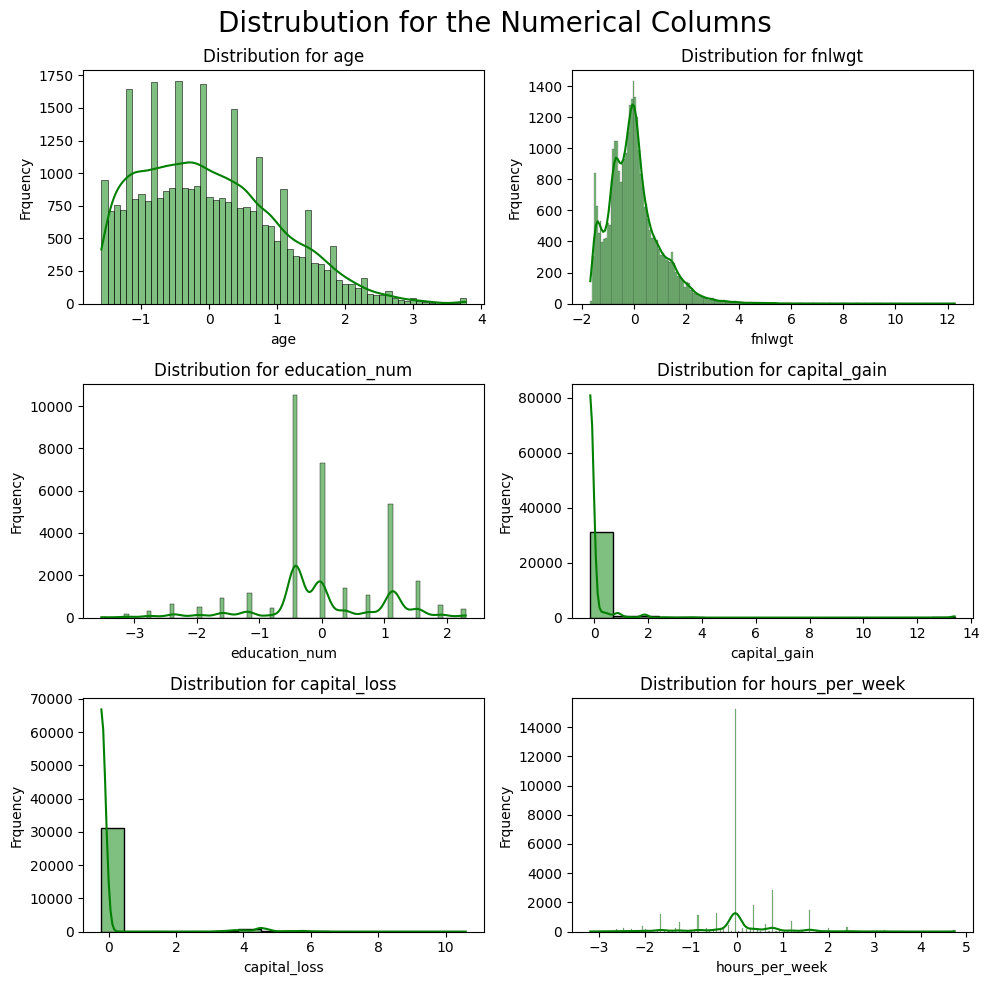

In [15]:
## let's check the effect of standard scaler
plt.figure(figsize=(10,10))
plt.suptitle('Distrubution for the Numerical Columns', fontsize=20)

for idx, col in enumerate(df[numerical_cols], 1):
    plt.subplot(3,2,idx)
    plt.title(f'Distribution for {col}')
    sns.histplot(data=df, x=df[col], kde=True, color='green')
    plt.xlabel(f'{col}')
    plt.ylabel('Frquency')
plt.tight_layout()
plt.show()

##### so, the numerical columns have been transformed

### <span style='color:#6A9C89'>2. Encoding Techniques:</span>

In [16]:
df.head(2)

age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   

        marital_status        occupation    relationship    race    sex  \
0        Never-married      Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse   Exec-managerial         Husband   White   Male   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0      0.148453      -0.21666       -0.035429   United-States   <=50K  
1     -0.145920      -0.21666       -2.222153   United-States   <=50K

In [17]:
## applying one hot encoding to categorical values with less than 5 categories
encoded_df = pd.get_dummies(data=df, columns=cat_cols_5_vars)

In [18]:
for i in encoded_df.iloc[:, 12:].columns:
    encoded_df[i]=encoded_df[i].astype(int)

In [19]:
encoded_df.head(2)

age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   

        marital_status        occupation    relationship  capital_gain  \
0        Never-married      Adm-clerical   Not-in-family      0.148453   
1   Married-civ-spouse   Exec-managerial         Husband     -0.145920   

   capital_loss  hours_per_week  native_country  race_ Amer-Indian-Eskimo  \
0      -0.21666       -0.035429   United-States                         0   
1      -0.21666       -2.222153   United-States                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   
1                         0            0            0            1   

   sex_ Female  sex_ Male  income_ <=50K  income_ >50K  
0            0          1              1             0  
1            0          1              1             0

In [20]:
## use label encoder for categories with more than 5 categoris
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])

In [21]:
encoded_df.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030671          7 -1.063611          9       1.134739               4   
1  0.837109          6 -1.008707          9       1.134739               2   
2 -0.042642          4  0.245079         11      -0.420060               0   
3  1.057047          4  0.425801          1      -1.197459               2   
4 -0.775768          4  1.408176          9       1.134739               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1      0.148453      -0.21666       -0.035429   
1           4             0     -0.145920      -0.21666       -2.222153   
2           6             1     -0.145920      -0.21666       -0.035429   
3           6             0     -0.145920      -0.21666       -0.035429   
4          10             5     -0.145920      -0.21666       -0.035429   

   native_country  race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  \
0              39                         0                         0   
1              39                         0                         0   
2              39                         0                         0   
3              39                         0                         0   
4               5                         0                         0   

   race_ Black  race_ Other  race_ White  sex_ Female  sex_ Male  \
0            0            0            1            0          1   
1            0            0            1            0          1   
2            0            0            1            0          1   
3            1            0            0            0          1   
4            1            0            0            1          0   

   income_ <=50K  income_ >50K  
0              1             0  
1              1             0  
2              1             0  
3              1             0  
4              1             0

#### <span style='color:#6A9C89'>i. Discuss the pros and cons of One-Hot-Encoding and Label-Encoding</span>
##### One-Hot Encoding and Label Encoding are both techniques used to transform categorical data into numerical format. Each has its strengths and weaknesses, depending on the nature of the data and the specific machine learning algorithms you're using. Here's a breakdown of the pros and cons of each:

### One-Hot-Encoding
##### Pros:
    1. No Ordinal Relationship Assumed: One-Hot Encoding does not assume any ordinal relationship between categories. This is ideal for nominal (unordered) categorical data, where the values do not have any inherent order (e.g., colors, countries).
   
    2. Prevents Misleading Model Assumptions: One-Hot Encoding avoids introducing artificial ordinal relationships, which can happen with Label Encoding in cases where the model might misinterpret the numerical encoding as having some meaningful distance (e.g., 1 is closer to 2 than 5).
    
    3. Works Well with Many Categories: For machine learning models like decision trees or random forests, One-Hot Encoding can be more effective because these models do not make assumptions about the data distribution and can handle a large number of categories better than models that assume a linear relationship.
##### Cons:
    1. High Dimensionality: One-Hot Encoding increases the number of features, especially when a categorical variable has many unique values. This can lead to "curse of dimensionality" and significantly increase the computational cost and memory usage.
  
    2. Sparse Data: One-Hot Encoding often produces sparse matrices (with many zeros), which can be inefficient in terms of both memory and computation.
  
    3. Can Lead to Overfitting: If there are many categories in a variable, One-Hot Encoding can lead to overfitting, especially with small datasets, because the model may end up memorizing the specific combinations of categories rather than learning general patterns.

### Label Encoding
##### Pros:
    1. Compact Representation: Label Encoding reduces the number of features by representing each category with a unique integer. This is especially beneficial when the categorical variable has many unique values, as it does not cause an increase in dimensionality like One-Hot Encoding does.
   
    2. Memory Efficient: Since it only uses integers, it requires less memory compared to One-Hot Encoding, especially for categorical variables with many categories.
  
    3. Works Well with Ordinal Data: Label Encoding is ideal when the categorical feature has an inherent order or rank (e.g., education level, product ratings). In this case, assigning numbers (1, 2, 3, etc.) makes sense, as it reflects the relationship between categories.
##### Cons:
    1. Assumes Ordinality: Label Encoding can introduce an unintended ordinal relationship. For example, the model might assume that the category "2" is closer to "3" than "1", which could lead to incorrect conclusions if the data is nominal rather than ordinal.
    
    2. Not Ideal for Nominal Data: For nominal (unordered) data, Label Encoding can distort the model's understanding by assigning numerical relationships that don't exist. For example, encoding "Red", "Blue", and "Green" as 1, 2, and 3 could mislead algorithms into thinking "Blue" is closer to "Green" than to "Red".
    
    3. Problematic with Algorithms That Assume Continuity: Some machine learning models, such as linear regression, might interpret the encoded values as continuous variables, potentially resulting in incorrect behavior or predictions.

### <span style='color:#6A9C89'>3. Feature Engineering:</span>

In [22]:
## create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choice
for i in encoded_df.columns:
    print(i)

age
workclass
fnlwgt
education
education_num
marital_status
occupation
relationship
capital_gain
capital_loss
hours_per_week
native_country
race_ Amer-Indian-Eskimo
race_ Asian-Pac-Islander
race_ Black
race_ Other
race_ White
sex_ Female
sex_ Male
income_ <=50K
income_ >50K


In [23]:
## based on the columns, we can create:
## 1. Income to hour ration : This feature measure the efficiency of income (capital gain minus loss) per hour worked.
## 2. Education work experience interaction : This feature captures the intercation between edicatiion level and the hours worked per week.

encoded_df['income_hours_ration'] = (encoded_df['capital_gain'] - encoded_df['capital_loss']) / encoded_df['hours_per_week']
encoded_df['education_experience'] = encoded_df['education_num'] * encoded_df['hours_per_week']

In [24]:
## this handle the potential infinite values (eg. divide by zero)
encoded_df.replace([float('inf'), -float('inf')], 0, inplace=True)

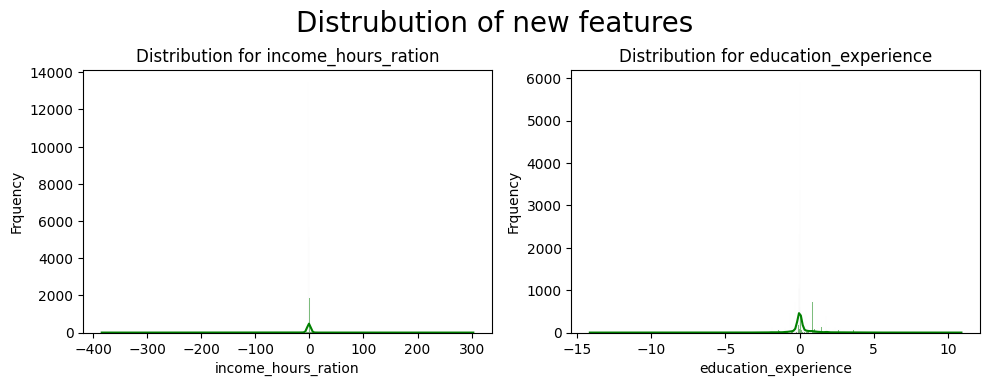

In [25]:
## checking the distribution of the new columns
new_features = ['income_hours_ration','education_experience']
plt.figure(figsize=(10,10))
plt.suptitle('Distrubution of new features', fontsize=20)

for idx, col in enumerate(encoded_df[new_features], 1):
    plt.subplot(3,2,idx)
    plt.title(f'Distribution for {col}')
    sns.histplot(data=encoded_df, x=encoded_df[col], kde=True, color='green')
    plt.xlabel(f'{col}')
    plt.ylabel('Frquency')
plt.tight_layout()
plt.show()

In [26]:
## the other task is to apply log transformation any skewed data
#E but we can see that there is now skewness in either of the column/feature
## so, no need to apply log-transformation

### <span style='color:#6A9C89'>4. Feature Selection:</span>

### Isolation Forest for Outlier Detection
    The isolation forest algorithm is a unsupervised machine learning method used to identify anomalies or outliers in a dataset. It works by isolating observations based on random splits. Outliers are easier to isolate than inliers because they differ significantly from the majority of the data.

In [27]:
encoded_df.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030671          7 -1.063611          9       1.134739               4   
1  0.837109          6 -1.008707          9       1.134739               2   
2 -0.042642          4  0.245079         11      -0.420060               0   
3  1.057047          4  0.425801          1      -1.197459               2   
4 -0.775768          4  1.408176          9       1.134739               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1      0.148453      -0.21666       -0.035429   
1           4             0     -0.145920      -0.21666       -2.222153   
2           6             1     -0.145920      -0.21666       -0.035429   
3           6             0     -0.145920      -0.21666       -0.035429   
4          10             5     -0.145920      -0.21666       -0.035429   

   native_country  race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  \
0              39                         0                         0   
1              39                         0                         0   
2              39                         0                         0   
3              39                         0                         0   
4               5                         0                         0   

   race_ Black  race_ Other  race_ White  sex_ Female  sex_ Male  \
0            0            0            1            0          1   
1            0            0            1            0          1   
2            0            0            1            0          1   
3            1            0            0            0          1   
4            1            0            0            1          0   

   income_ <=50K  income_ >50K  income_hours_ration  education_experience  
0              1             0           -10.305338             -0.040203  
1              1             0            -0.031834             -2.521563  
2              1             0            -1.996617              0.014882  
3              1             0            -1.996617              0.042425  
4              1             0            -1.996617             -0.040203

In [39]:
from sklearn.ensemble import IsolationForest
## as there is no target column, we will use the whole dataset
features = encoded_df.copy()
## initializing isolation forest
iso_forest = IsolationForest()

In [40]:
## for finding out the perfecct scorer
from sklearn.metrics import make_scorer
## def for custom scorer
def custom_scorer(estimator, X):
    scores = estimator.decision_function(X)
    return np.mean(scores)

In [41]:
## creating a scoere object
scorer = make_scorer(custom_scorer, greater_is_better=True)

In [42]:
iso_forest = IsolationForest()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.75, 1.0],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [0.5, 0.75, 1.0],
}

In [43]:
## hyper-parameter tunning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=iso_forest, param_grid=parameters, scoring=scorer, cv = 3)
grid.fit(features)

GridSearchCV(cv=3, estimator=IsolationForest(),
             param_grid={'contamination': [0.01, 0.05, 0.1],
                         'max_features': [0.5, 0.75, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(custom_scorer, response_method='predict'))

In [44]:
grid.best_params_

{'contamination': 0.01,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 50}

In [45]:
model = IsolationForest(n_estimators=50, max_features=0.5, max_samples=0.5, contamination=0.01, random_state=42)

In [46]:
## fit and predict outliers
outlier_predictions = model.fit_predict(features)

In [47]:
## adding a flag for outliers to the dataframe
features['outlier_flag'] = outlier_predictions

In [48]:
## separating inliers and outliers
inliers = features[features['outlier_flag'] != -1]
outliers = features[features['outlier_flag'] == -1]

In [49]:
## now, we can drop the outlier_flag from cleaned data / original data
encoded_df_cleaned = inliers.drop(columns = ['outlier_flag'])

In [50]:
## displaying the results
print(f'Original dataset size = {encoded_df.shape[0]}')
print(f'Cleaned dataset size = {encoded_df_cleaned.shape[0]}')
print(f'Number of Outliers Detected = {outliers.shape[0]}')

Original dataset size = 32561
Cleaned dataset size = 32235
Number of Outliers Detected = 326


In [57]:
## PCA (Principal Composition Analysis)
from sklearn.decomposition import PCA
## now we can reduce the dimenstionality of dataset for vizualization
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features.drop(columns=['outlier_flag']))

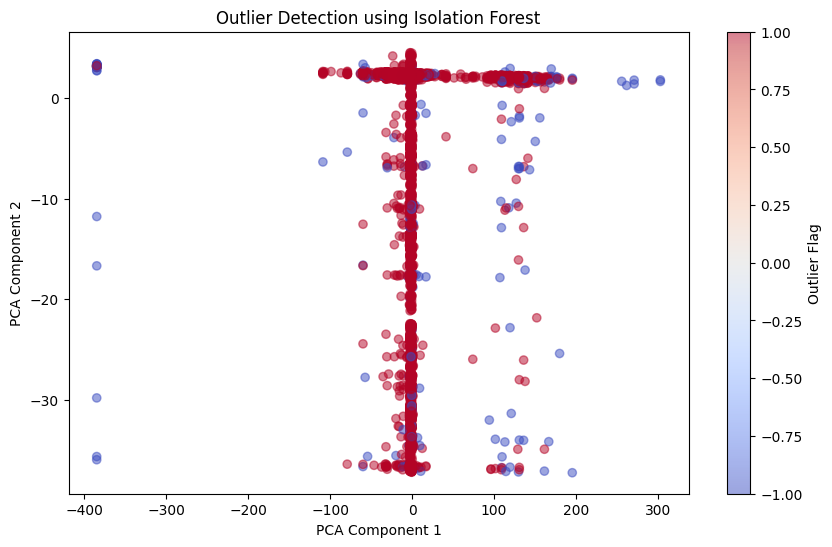

In [58]:
## Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=features['outlier_flag'], cmap='coolwarm', alpha=0.5)
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Outlier Flag')
plt.show()

In [60]:
## applying pps (Predictive Power Scope) to find and discuss the relationships between features.
import ppscore as pps
## calculate PPS for the feature in dataset
pps_matrix = pps.matrix(encoded_df)
pps_matrix.head()

x              y  ppscore            case  is_valid_score  \
0  age            age      1.0  predict_itself            True   
1  age      workclass      0.0      regression            True   
2  age         fnlwgt      0.0      regression            True   
3  age      education      0.0      regression            True   
4  age  education_num      0.0      regression            True   

                metric  baseline_score  model_score                    model  
0                 None        0.000000     1.000000                     None  
1  mean absolute error        0.742600     0.875681  DecisionTreeRegressor()  
2  mean absolute error        0.718838     0.734594  DecisionTreeRegressor()  
3  mean absolute error        2.759000     2.806164  DecisionTreeRegressor()  
4  mean absolute error        0.720260     0.737871  DecisionTreeRegressor()

In [68]:
## numeric columns for vizualization
pps_numeric_matrix = pps_matrix.select_dtypes(include = ['number'])

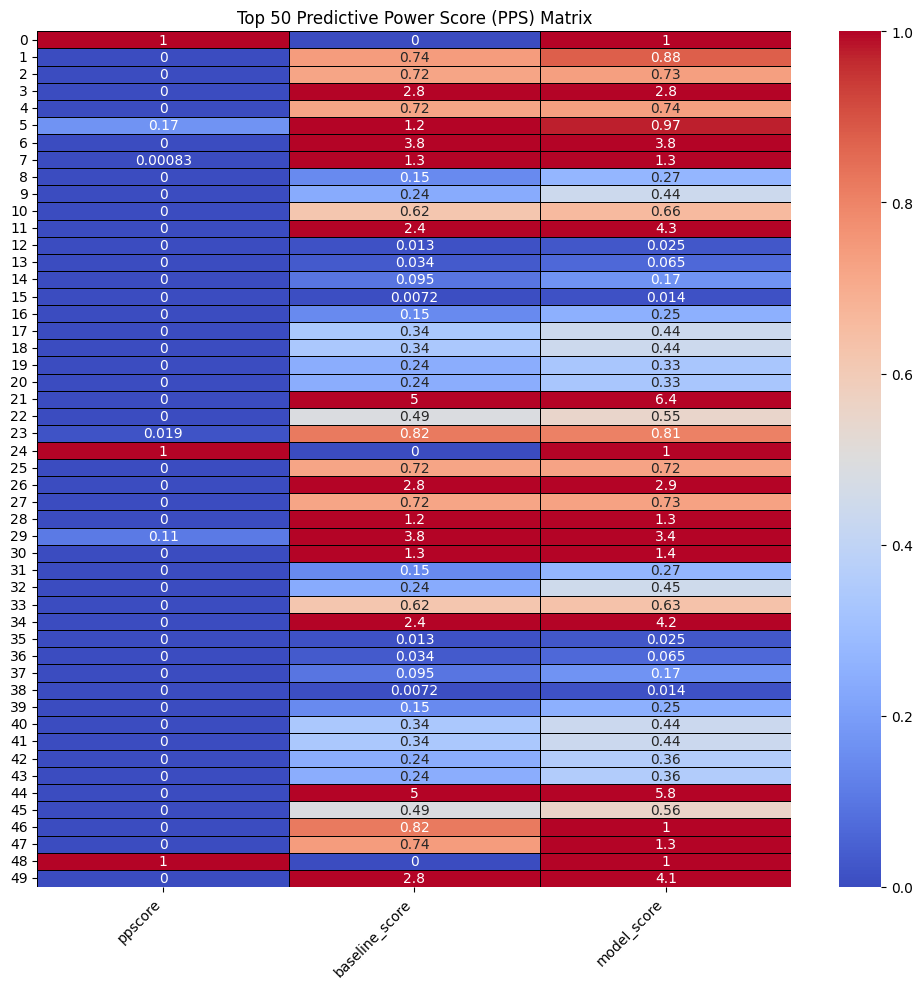

In [79]:
## let's vizualize pps matrix
plt.figure(figsize = (10,10))
sns.heatmap(pps_numeric_matrix.head(50),annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Top 50 Predictive Power Score (PPS) Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

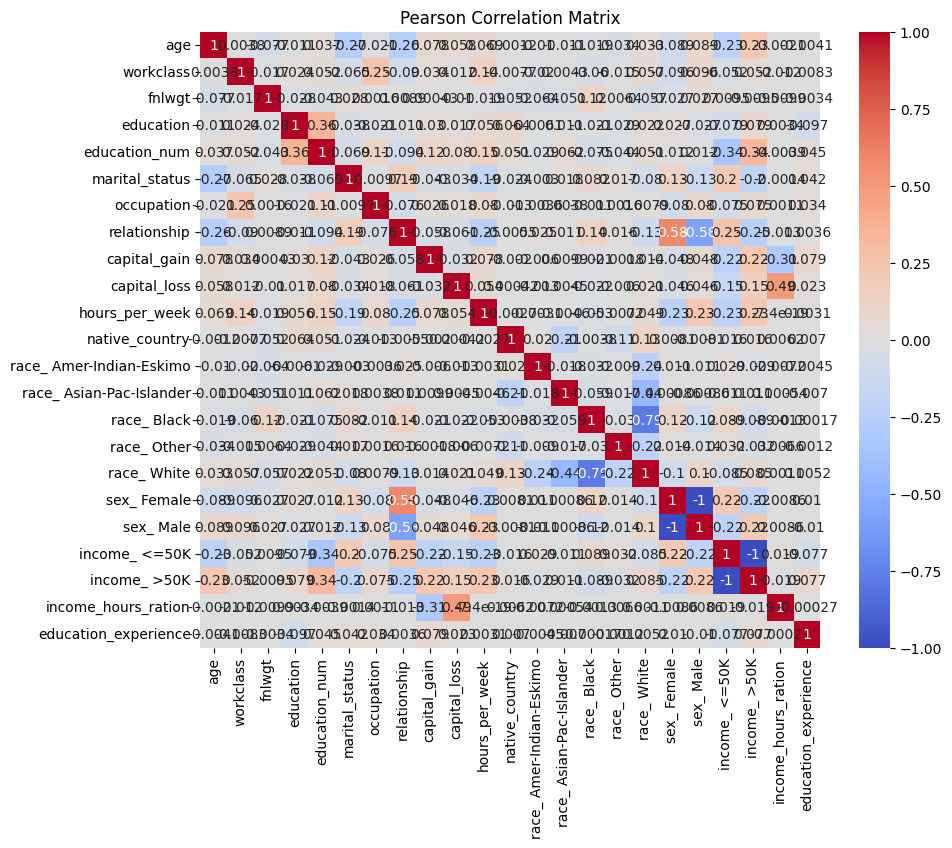

In [76]:
## Calculate Pearson correlation matrix
corr_matrix = encoded_df.corr()
plt.figure(figsize=(10,10))
## Visualize the correlation matrix (heatmap)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

### Interpreting the Results:
    1. When you look at the PPS matrix, you will notice that the values indicate the predictive power between each pair of features.
    2. The Correlation Matrix will show the linear dependencies between features.
    3. By comparing both matrices, you can get a sense of whether there are strong non-linear relationships that the correlation matrix might have missed.

### Key Differences Between PPS and Pearson Correlation:
#### Linear vs Non-linear:
    1. Pearson correlation only measures the linear relationship between variables. If there is a non-linear relationship, Pearson will fail to capture it.
    2. PPS captures both linear and non-linear relationships. It is more powerful when dealing with complex datasets, as it considers more varied relationships between features.
#### Interpretation:
    1. Correlation gives a value between -1 and 1, where -1 means a perfect negative relationship, 1 means a perfect positive relationship, and 0 indicates no linear relationship.
    2. PPS gives a value between 0 and 1, where 1 means one feature perfectly predicts another, and 0 means no predictive power. PPS values are often easier to interpret when it comes to predicting one variable using another.
#### Handling Categorical Data:
    1. Pearson requires continuous numeric variables, which might not be ideal if your data includes categorical features.
    2. PPS can handle categorical variables as well, which is beneficial when you have mixed types of data.